## Imports

In [47]:
import pandas as pd
import sys

# Change system path to base directory.
sys.path.append("..")
from preprocessing.preprocessor import Preprocessor
from datasets.fake_news_detection import FakeNewsDetectionDataset

## Read test and train datasets

In [48]:
train = pd.read_csv('../raw_data/fulltrain.csv', header=None)
test = pd.read_csv('../raw_data/balancedtest.csv', header=None)
train.columns=['label', 'text']
test.columns=['label', 'text']
print(train.head())
print(test.head())

   label                                               text
0      1  A little less than a decade ago, hockey fans w...
1      1  The writers of the HBO series The Sopranos too...
2      1  Despite claims from the TV news outlet to offe...
3      1  After receiving 'subpar' service and experienc...
4      1  After watching his beloved Seattle Mariners pr...
   label                                               text
0      1  When so many actors seem content to churn out ...
1      1   In what football insiders are calling an unex...
2      1  In a freak accident following Game 3 of the N....
3      1  North Koreas official news agency announced to...
4      1  The former Alaska Governor Sarah Palin would b...


## Data distribution

3    17870
1    14047
4     9995
2     6942
Name: label, dtype: int64


<AxesSubplot:title={'center':'Distribution of train labels'}>

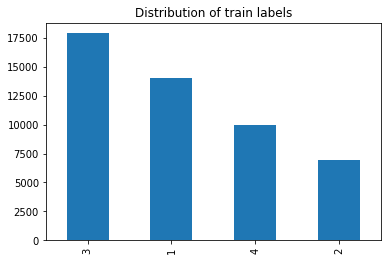

In [49]:
print(train['label'].value_counts())
train_counts = train['label'].value_counts()
train_counts.plot(kind = 'bar', title = 'Distribution of train labels')
# Imbalanced distribution of documents in each label

1    750
2    750
3    750
4    750
Name: label, dtype: int64


<AxesSubplot:title={'center':'Distribution of test labels'}>

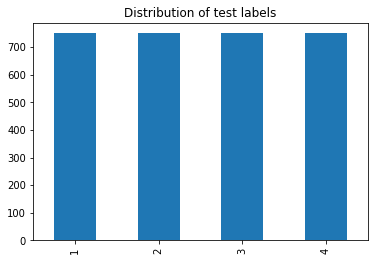

In [50]:
print(test['label'].value_counts())
test_counts = test['label'].value_counts()
test_counts.plot(kind = 'bar', title = 'Distribution of test labels')

## Data length

In [51]:
preprocessor = Preprocessor(perform_case_folding=True,
                            remove_stop_words=False,
                            remove_punctuation=False,
                            perform_lemmatization=False,
                            perform_stemming=False)
train['tokenized'] = train['text'].map(preprocessor.process)

In [52]:
train['num_words'] = train['tokenized'].map(len)
print('Longest article in training set: %s; shortest article in training set: %s'
    % (train['num_words'].max(), train['num_words'].min()))
print('Average document length: %s' % train['num_words'].mean())
# Large range in lengths of documents

Longest article in training set: 131930; shortest article in training set: 2
Average document length: 604.3852703975109


In [53]:
train.nsmallest(10, ['num_words'])

,label,text,tokenized,num_words
350,1,Buffalo Bills,"[buffalo, bills]",2
351,1,Pittsburgh Steelers,"[pittsburgh, steelers]",2
352,1,Jacksonville Jaguars,"[jacksonville, jaguars]",2
353,1,Denver Broncos,"[denver, broncos]",2
8884,1,Minnesota Vikings,"[minnesota, vikings]",2
8885,1,Atlanta Falcons,"[atlanta, falcons]",2
8886,1,Seattle Seahawks,"[seattle, seahawks]",2
14913,2,abfs daksl,"[abfs, daksl]",2
18158,2,American News,"[american, news]",2
21253,3,About Page,"[about, page]",2


In [54]:
train.nlargest(10, ['num_words'])

,label,text,tokenized,num_words
35683,3,Obama Quietly Signs Executive Order to Achieve...,"[obama, quietly, signs, executive, order, to, ...",131930
36226,3,22 Medical Studies That Show Vaccines Can Caus...,"[22, medical, studies, that, show, vaccines, c...",38853
21664,3,"Bradley Manning Gets 35 Years, Dishonorable Di...","[bradley, manning, gets, 35, years, ,, dishono...",34139
31822,3,Florida Court Rules Off Grid Living IllegalBy ...,"[florida, court, rules, off, grid, living, ill...",25636
30941,3,Venezuela Is Out of Food: Heres What an Econom...,"[venezuela, is, out, of, food, :, heres, what,...",25076
34356,3,Doctors Sound Alarm as State of Emergency Decl...,"[doctors, sound, alarm, as, state, of, emergen...",23520
25213,3,"Aluminum, Barium and Strontium: the New Manhat...","[aluminum, ,, barium, and, strontium, :, the, ...",23512
32709,3,10 Ways To Spot a False Flag Mass ShootingByJo...,"[10, ways, to, spot, a, false, flag, mass, sho...",21332
36952,3,BUSTED: Videos of Virginia Reporter Shooting H...,"[busted, :, videos, of, virginia, reporter, sh...",20598
24877,3,The Department of Justice Prepares to Step up ...,"[the, department, of, justice, prepares, to, s...",20338


## Words common in each category

In [55]:
preprocessor = Preprocessor(perform_case_folding=True,
                            remove_stop_words=True,
                            remove_punctuation=True,
                            perform_lemmatization=False,
                            perform_stemming=False)
training_dataset = FakeNewsDetectionDataset("../raw_data/fulltrain.csv",
        transform=preprocessor.process, target_transform=lambda x: int(x) - 1)

In [56]:
CATEGORIES = { 1: 'Satire', 2: 'Hoax', 3: 'Propaganda', 4: 'Reliable news' }
document_frequencies = pd.DataFrame.from_dict(training_dataset.document_frequencies, orient='index')
document_frequencies.columns = [1, 2, 3, 4]
document_frequencies['sum'] = document_frequencies.sum(axis='columns')
document_frequencies.head()

,1,2,3,4,sum
little,2364,433,3538,1172,7507
less,932,221,3346,1206,5705
decade,249,54,1061,415,1779
ago,1007,359,2923,1311,5600
hockey,104,4,22,56,186


In [57]:
document_frequencies.nlargest(10, ['sum'])

,1,2,3,4,sum
said,11847,1526,7164,7598,28135
one,5758,2525,10825,4433,23541
would,5355,1876,10112,4134,21477
time,6287,1831,8691,3263,20072
also,3704,1766,9551,4767,19788
people,3257,1884,10037,3640,18818
new,4115,1563,9067,4003,18748
like,4883,1604,9625,2391,18503
first,3330,1349,9160,3606,17445
even,4094,1139,9250,2250,16733


In [58]:
document_frequencies['satire'] = document_frequencies[1] / document_frequencies['sum']
document_frequencies['hoax'] = document_frequencies[2] / document_frequencies['sum']
document_frequencies['propaganda'] = document_frequencies[3] / document_frequencies['sum']
document_frequencies['reliable'] = document_frequencies[4] / document_frequencies['sum']
document_frequencies.head()

,1,2,3,4,sum,satire,hoax,propaganda,reliable
little,2364,433,3538,1172,7507,0.314906,0.057679,0.471293,0.156121
less,932,221,3346,1206,5705,0.163365,0.038738,0.586503,0.211394
decade,249,54,1061,415,1779,0.139966,0.030354,0.596402,0.233277
ago,1007,359,2923,1311,5600,0.179821,0.064107,0.521964,0.234107
hockey,104,4,22,56,186,0.559140,0.021505,0.118280,0.301075


In [59]:
reliable = document_frequencies[document_frequencies[4] > (train_counts[4] * 0.1)]
reliable.nlargest(50, ['reliable'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
taiwan,3,2,52,1739,1796,0.001670,0.001114,0.028953,0.968263
--,89,1,46,3685,3821,0.023292,0.000262,0.012039,0.964407
'the,2280,0,0,2825,5105,0.446621,0.000000,0.000000,0.553379
chinese,130,20,768,1128,2046,0.063539,0.009775,0.375367,0.551320
's,7326,0,0,8531,15857,0.462004,0.000000,0.000000,0.537996
'we,1979,0,0,2225,4204,0.470742,0.000000,0.000000,0.529258
minister,179,136,985,1378,2678,0.066841,0.050784,0.367812,0.514563
saturday,611,104,302,1043,2060,0.296602,0.050485,0.146602,0.506311
wednesday,1294,121,479,1825,3719,0.347943,0.032536,0.128798,0.490723
thursday,1262,101,477,1768,3608,0.349778,0.027993,0.132206,0.490022


In [60]:
satire = document_frequencies[document_frequencies[1] > (train_counts[1] * 0.1)]
satire.nlargest(50, ['satire'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
'd,1470,0,0,479,1949,0.754233,0.000000,0.000000,0.245767
'but,1562,0,0,590,2152,0.725836,0.000000,0.000000,0.274164
'll,1474,0,0,596,2070,0.712077,0.000000,0.000000,0.287923
'm,2025,0,0,838,2863,0.707300,0.000000,0.000000,0.292700
've,1833,0,0,906,2739,0.669222,0.000000,0.000000,0.330778
reportedly,2861,581,686,178,4306,0.664422,0.134928,0.159313,0.041338
confirmed,2703,230,979,407,4319,0.625839,0.053253,0.226673,0.094235
n't,4333,0,0,2927,7260,0.596832,0.000000,0.000000,0.403168
reporters,2953,874,472,658,4957,0.595723,0.176316,0.095219,0.132742
adding,2191,75,669,790,3725,0.588188,0.020134,0.179597,0.212081


In [61]:
hoax = document_frequencies[document_frequencies[2] > (train_counts[2] * 0.1)]
hoax.nlargest(50, ['hoax'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
commented,28,695,186,32,941,0.029756,0.738576,0.197662,0.034006
donald,160,1112,435,67,1774,0.090192,0.626832,0.245209,0.037768
trump,32,1282,727,20,2061,0.015526,0.622028,0.352741,0.009704
obamas,61,1069,1030,5,2165,0.028176,0.493764,0.475751,0.002309
...,393,1117,132,738,2380,0.165126,0.469328,0.055462,0.310084
muslim,50,720,671,165,1606,0.031133,0.448319,0.417808,0.102740
breaking,254,864,843,113,2074,0.122469,0.416586,0.406461,0.054484
hillary,97,866,991,155,2109,0.045993,0.410621,0.469891,0.073495
think,2492,5246,5356,1380,14474,0.172171,0.362443,0.370043,0.095343
obama,509,2496,3121,1047,7173,0.070961,0.347972,0.435104,0.145964


In [62]:
propaganda = document_frequencies[document_frequencies[3] > (train_counts[3] * 0.1)]
propaganda.nlargest(50, ['propaganda'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
linkwithin_text=related,0,0,3169,0,3169,0.000000,0.000000,1.000000,0.000000
http,7,13,1882,34,1936,0.003616,0.006715,0.972107,0.017562
articles,95,30,6258,58,6441,0.014749,0.004658,0.971588,0.009005
propaganda,24,39,1956,44,2063,0.011634,0.018905,0.948134,0.021328
article,195,139,7892,182,8408,0.023192,0.016532,0.938630,0.021646
corporations,62,17,1823,72,1974,0.031408,0.008612,0.923506,0.036474
writes,38,40,2560,146,2784,0.013649,0.014368,0.919540,0.052443
activist,72,57,2595,101,2825,0.025487,0.020177,0.918584,0.035752
2013,100,89,2311,65,2565,0.038986,0.034698,0.900975,0.025341
link,89,24,1875,109,2097,0.042442,0.011445,0.894134,0.051979
